# 0. T_Introduction to Facebook Prophet

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from fbprophet import Prophet

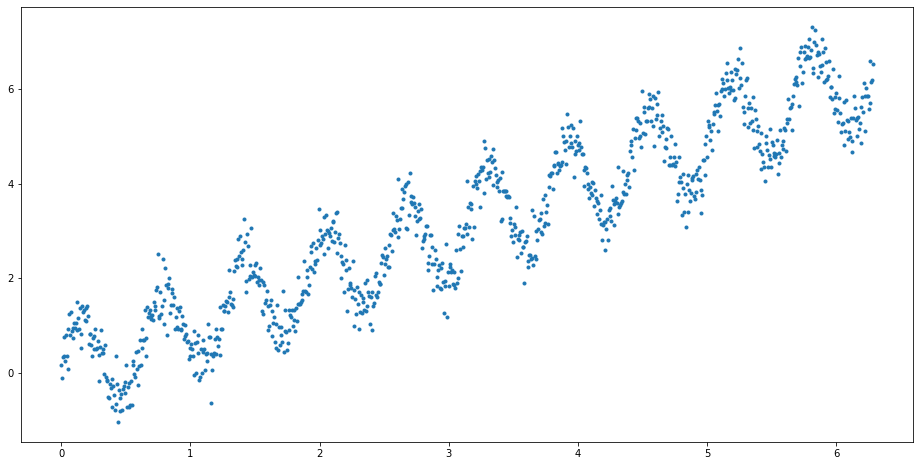

In [87]:
# process data and save it as signal.csv

fig = plt.figure(figsize = (16,8))
t = np.linspace(0,2*np.pi,1000)

start = pd.Timestamp('2015-07-01')
end = pd.Timestamp('2020-08-01')

datetime = np.linspace(start.value, end.value, 1000)
y = np.sin(t*10) + t
y = y + np.random.normal(0, 0.3, 1000)

plt.plot(t,y,'.')


df = pd.DataFrame(data = {'ds':dict(timestamp=pd.to_datetime(datetime))['timestamp']})
df.ds = df.ds.dt.strftime('%Y-%m-%d %H:%M:%S')
df['y'] = y

df.to_csv('Data/sine.csv')

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


                      ds
0    2015-07-01 00:00:00
1    2015-07-02 20:38:11
2    2015-07-04 17:16:23
3    2015-07-06 13:54:35
4    2015-07-08 10:32:47
...                  ...
1360 2021-07-28 00:00:00
1361 2021-07-29 00:00:00
1362 2021-07-30 00:00:00
1363 2021-07-31 00:00:00
1364 2021-08-01 00:00:00

[1365 rows x 1 columns]


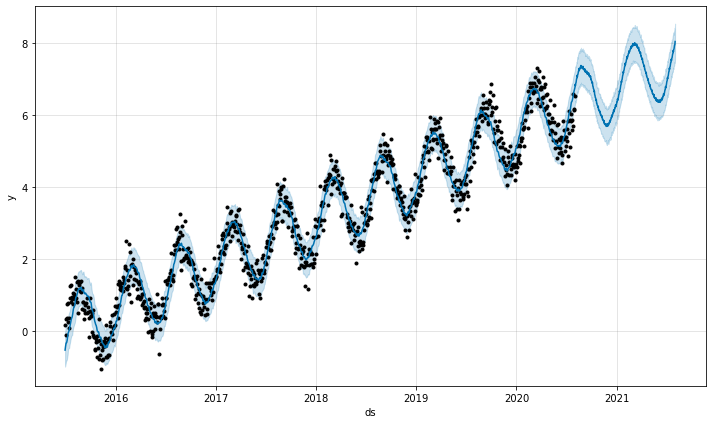

In [91]:
# testing

df = df.sample(frac=1)

m = Prophet()

m.fit(df)

future = m.make_future_dataframe(periods = 365)

forecast = m.predict(future)

fig1 = m.plot(forecast)


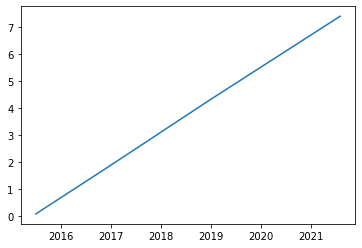

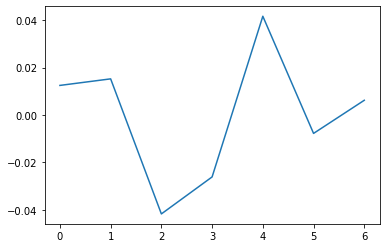

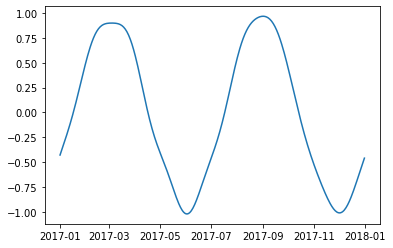

In [63]:
# grab the individual data from plot components

for trend in lines.get_axes():
    x,y = trend.lines[0].get_data()
    plt.plot(x,y)
    plt.show()


(array([datetime.datetime(2015, 7, 1, 0, 0),
        datetime.datetime(2015, 7, 2, 20, 38, 11, 891891),
        datetime.datetime(2015, 7, 4, 17, 16, 23, 783783), ...,
        datetime.datetime(2021, 7, 30, 0, 0),
        datetime.datetime(2021, 7, 31, 0, 0),
        datetime.datetime(2021, 8, 1, 0, 0)], dtype=object),
 array([0.06949703, 0.07560949, 0.08172195, ..., 7.39841244, 7.40167405,
        7.40493566]))

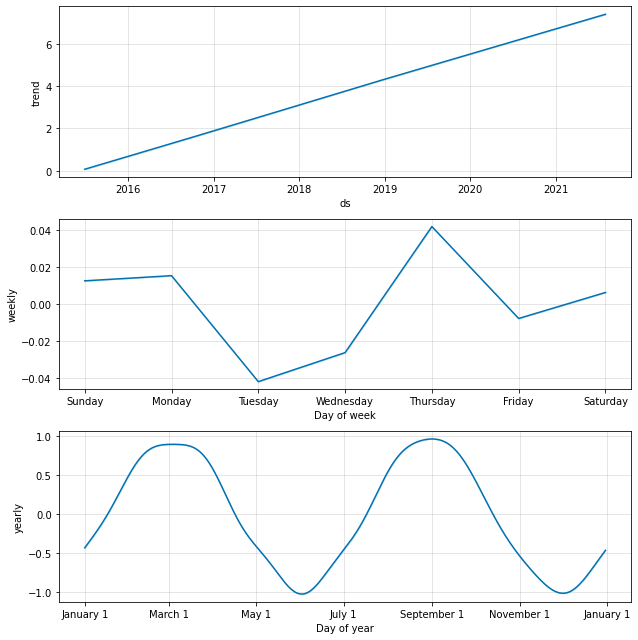

In [49]:
lines = m.plot_components(forecast)

# Trend Values
trend = lines.get_axes()[0]
trend.lines[0].get_data()